# Лабораторная работа 8
# Обход бинарного дерева поиска. Поиск максимального и минимального значений

## Гимбицкий Матвей  15.05.25

# Задание 8.1 Определение классов

In [41]:
class EmptyNode:
    def __repr__(self):
        return "*"
    
    def insert(self, value):
        return NonEmptyNode(value)
    
    def __contains__(self, value):
        return False
    
    def __len__(self):
        return 0
    
    def lcr(self):
        return []

class NonEmptyNode:
    def __init__(self, value):
        self.value = value
        self.left = EmptyNode()
        self.right = EmptyNode()
    
    def __repr__(self):
        return f"({self.left} {self.value} {self.right})"
    
    def insert(self, value):
        if value < self.value:
            self.left = self.left.insert(value)
        elif value > self.value:
            self.right = self.right.insert(value)
        return self
    
    def __contains__(self, value):
        if value == self.value:
            return True
        elif value < self.value:
            return value in self.left
        else:
            return value in self.right
    
    def __len__(self):
        return 1 + len(self.left) + len(self.right)
    
    def lcr(self):
        return self.left.lcr() + [self.value] + self.right.lcr()

class BinaryTree:
    def __init__(self):
        self.root = EmptyNode()
    
    def __repr__(self):
        return repr(self.root)
    
    def insert(self, value):
        self.root = self.root.insert(value)
    
    def __contains__(self, value):
        return value in self.root
    
    def __len__(self):
        return len(self.root)
    
    def lcr(self):
        return self.root.lcr()

In [42]:
class BinaryNode:
    def __init__(self, left, value, right):
        self.left = left
        self.value = value
        self.right = right

    def __repr__(self):
        return f'({self.left}, {self.value}, {self.right})'

    def insert(self, value):
         if value<self.value:
             self.left =self.left.insert(value)
         else:
             self.right =self.right.insert(value)
         return self
    def __contains__(self, value):
        if value==self.value:
            return True
        if value<self.value:
            return value in self.left
        if value>self.value:
            return value in self.right 
    def __len__(self):
        return self.numberOfNodes
    def lcr(self):
        result = self.left.lcr()        
        result += [self.value]         
        result += self.right.lcr()      
        return result

In [43]:
import random as rnd
source_data = list(rnd.uniform(0,100) for _ in range(10**3))

In [44]:
tree = BinaryTree()
for i in source_data:
    tree.insert(i)

In [45]:
sorted_data = tree.lcr()

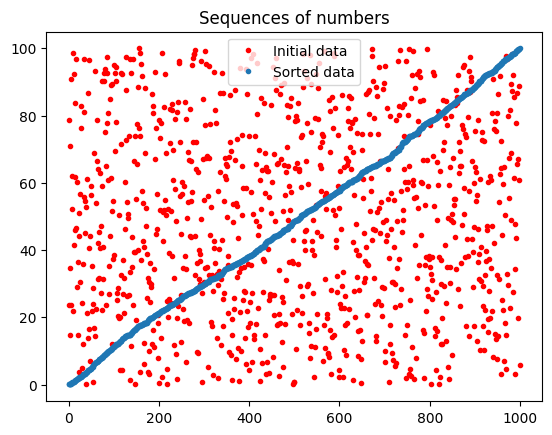

In [46]:
import matplotlib.pyplot as plt
plt.plot(source_data,'r.', label='Initial data')
plt.plot(sorted_data,' .',label='Sorted data')
plt.title('Sequences of numbers')
plt.legend()

In [47]:
class EmptyNode:
    def __repr__(self):
        return '*'

    def insert(self, value):
        return BinaryNode(self, value, self)
    def __contains__(self, value):
        return False
    def __len__(self):
        return 0
    def lcr(self):
        return []

# Задание 8.2. Нахождение минимального и максимального значения

In [48]:
class BinaryTree:
    def __init__(self):
        self.root = EmptyNode()
        BinaryNode.numberOfNodes = 0
    def __repr__(self):
        return repr(self.root)
    def insert(self, value):
        self.root = self.root.insert(value)
    def __contains__(self, value):
        return value in self.root
    def __len__(self):
        return len(self.root)
    def lcr(self):
        return self.root.lcr()
    def min(self):
        return self.root.min()
    def max(self):
        return self.root.max()



In [49]:
class BinaryNode:
    def __init__(self, left, value, right):
        self.left = left
        self.value = value
        self.right = right
        BinaryNode.numberOfNodes += 1 

    def __repr__(self):
        return f'({self.left}, {self.value}, {self.right})'

    def insert(self, value):
         if value<self.value:
             self.left =self.left.insert(value)
         else:
             self.right =self.right.insert(value)
         return self
    def __contains__(self, value):
        if value==self.value:
            return True
        if value<self.value:
            return value in self.left
        if value>self.value:
            return value in self.right 
    def __len__(self):
        return self.numberOfNodes
    def lcr(self):
        result = self.left.lcr()        
        result += [self.value]         
        result += self.right.lcr()      
        return result
    def min(self):
        if isinstance(self.left, EmptyNode):
            return self.value
        else:
            return self.left.min() 
    def max(self):
        if isinstance(self.right, EmptyNode):
            return self.value
        else:
            return self.right.max()


In [50]:
class EmptyNode:
    def __repr__(self):
        return '*'
    def insert(self, value):
        return BinaryNode(self, value, self)
    def __contains__(self, value):
        return False
    def __len__(self):
        return 0
    def lcr(self):
        return []
    def min(self):
        return None
    def max(self):
        return None

In [51]:
tree = BinaryTree()
for i in source_data:
    tree.insert(i)

In [52]:
tree.min()

0.01956353544595446

In [53]:
sorted_data[0]

0.01956353544595446

In [54]:
tree.max()

99.9511421695064

In [55]:
sorted_data[999]

99.9511421695064

# Задание 8.4 Примеры пользовательских классов

In [56]:
class Tasks:
    def __init__(self, task, time):
        self.task = task
        self.time = time

    @classmethod
    def strToTime(cls, obj):
        return [cls(str(task), float(time)) for task, time in obj.items()]
    
    @staticmethod
    def is_long_task(time):
        return time >= 5

    def __repr__(self):
        return f"task={self.task}, time={self.time}"

tasks = Tasks.strToTime({'tidy up': 0.5, 'wash the dishes': 0.7})
for t in tasks:
    print(t)
    print("Is long task?", Tasks.is_long_task(t.time))


task=tidy up, time=0.5
Is long task? False
task=wash the dishes, time=0.7
Is long task? False


In [57]:
class Timer:
    def __init__(self, minutes=0):
        self._minutes = minutes 
    @property
    def hours(self):
        return self._minutes / 60

    @hours.setter
    def hours(self, value):
        self._minutes = value * 60

    @hours.deleter
    def hours(self):
        self._minutes = 0

    def __repr__(self):
        return f"{self._minutes} мин ({self.hours:.2f} ч)"


t = Timer(90)
print(t)          

t.hours = 2       
print(t)         

del t.hours       
print(t)          


90 мин (1.50 ч)
120 мин (2.00 ч)
0 мин (0.00 ч)


In [58]:
from abc import ABC, abstractmethod

class AbstractNode(ABC):
    @abstractmethod
    def time_Country(self, time):
        raise TypeError("Action must be defined in subclasses")

    @abstractmethod
    def country(self, country):
        raise TypeError("Action must be defined in subclasses")

class Tour(AbstractNode):
    def __init__(self):
        self.country_name = None
        self.time = None

    def time_Country(self, time):
        if self.country_name == 'Germany':
            self.time = time - 1
        elif self.country_name == 'Canada':
            self.time = time + 7
        else:
            self.time = time  

    def country(self, country):
        self.country_name = country

    def __repr__(self):
        return f"country {self.country_name} time {self.time}"

x = Tour()
x.country('Germany')        
x.time_Country(6.5)         
print(x)                    

country Germany time 5.5


In [59]:
class Singleton:
    instance = None
    def __new__(cls, *args, **kwarg):
        if cls.instance is None:
            cls.instance = super().__new__(cls)
        return cls.instance

class Single(Singleton):
    def __init__(self, gr):
        self.gr=gr


In [60]:
i1 = Single('Belarus'); i2 = Single('Poland')
i1 is i2

True

In [61]:
class Student:
    def __init__(self, last_name, first_name):
        self.last_name = last_name
        self.first_name = first_name
    def __repr__(self):
        return f"{self.last_name} {self.first_name}"

class SessionMarks:
    def __init__(self, math, physics):
        self.math = math
        self.physics = physics

    def __repr__(self):
        return f"math: {self.math}, physics: {self.physics}"

class StudentRecord:
    def __init__(self, student_name,student_fam, mark1,mark2):
        self.student =Student(student_fam,student_name)
        self.marks = SessionMarks(math=mark1, physics=mark2)           

    def __repr__(self):
        return f"{self.student} marks: [{self.marks}]"

record1 = StudentRecord('bfdyj','fddds', 9,5)
print(record1)


fddds bfdyj marks: [math: 9, physics: 5]


In [62]:
class Wrapper:
    def __init__(self, obj):
        self.wrapped = obj
    def __getattr__(self, attrname):
        print(f'Trace: {attrname}')
        return getattr(self.wrapped, attrname)
    def __repr__(self):
        return repr(self.wrapped)
x = Wrapper([1,2,3])
x.pop()

Trace: pop


3

In [63]:
x.append(10)

Trace: append


In [64]:
class Wrapper():
    def __init__(self, nam,task=None):
        self.nam={nam:task}
        self._key=nam
    def task(self,taskk):
        self.nam[self._key]=taskk
    def  __getattr__(self, attrname):
        print(f"New task: {attrname}")
        return getattr(self.nam ,attrname)
    def __repr__(self):
        return repr(self.nam)

In [65]:
y=Wrapper('masha')
print(y)

{'masha': None}


In [66]:
y.task('do math')
print(y)

{'masha': 'do math'}


In [67]:
print(y.keys())

New task: keys
dict_keys(['masha'])


In [68]:
from dataclasses import dataclass, field
@dataclass
class Opyt:
    name: str
    marks: field(default_factory=[])
    sredni: float = field(init=False) 
    def __post_init__(self):
        self.sredni=sum(self.marks)/len(self.marks) if self.marks else 0.0
        
    

In [69]:
x = Opyt("masha", [9, 5, 10])
print(x)  
print(x.sredni)

Opyt(name='masha', marks=[9, 5, 10], sredni=8.0)
8.0
